# Week 9, 10

# 26 April, 2023


### Write the python codes to build the clustering models on at least 4 datasets(using kmeans,kmediod,k-means++ and hierarchial) build the model with atleast 4 train_test_split combinations and different set of hyperparameter values. Perform the data preprocessing and performance evaluation for the model.


In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

urls = ["https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
        "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"]
datasets = [pd.read_csv(url, header=None) for url in urls]

split_ratios = [0.2, 0.3, 0.4, 0.5]
n=[3,4,5,6]

# Select the columns to use for clustering
Xs = [dataset.iloc[:, :4].values for dataset in datasets]

# Train/test split and model fitting
results = []
for i, dataset in enumerate(Xs):
    for n_ in n:
        for split_ratio in split_ratios:
            # Split the dataset into training and testing subsets
            X_train, X_test = train_test_split(dataset, test_size=split_ratio, random_state=42)

            # Fit the KMeans model
            kmeans = KMeans(n_clusters=n_, random_state=42, n_init=10).fit(X_train)
            kmeans_labels = kmeans.predict(X_test)
            kmeans_score = silhouette_score(X_test, kmeans_labels)
        
            # Fit the KMedoids model
            kmedoids = KMedoids(n_clusters=n_, random_state=42).fit(X_train)
            kmedoids_labels = kmedoids.predict(X_test)
            kmedoids_score = silhouette_score(X_test, kmedoids_labels)

            # Fit the KMeans++ model
            kmeanspp = KMeans(n_clusters=n_, init='k-means++', random_state=42, n_init=10).fit(X_train)
            kmeanspp_labels = kmeanspp.predict(X_test)
            kmeanspp_score = silhouette_score(X_test, kmeanspp_labels)
        
            # Fit the Agglomerative Clustering model
            agg = AgglomerativeClustering(n_clusters=n_).fit(X_train)
            agg_labels = agg.fit_predict(X_test)
            agg_score = silhouette_score(X_test, agg_labels)

            result = {
                'dataset': i+1,
                'split_ratio': split_ratio,
                'kmeans_score': kmeans_score,
                'kmedoids_score': kmedoids_score,
                'kmeanspp_score': kmeanspp_score,
                'agg_score': agg_score,
                'number_of_clusters':n_
            }
            results.append(result)

# Convert the results to a Pandas dataframe and save as a CSV file
df = pd.DataFrame(results)
df.to_csv('cluster_scores.csv', index=False)
df.sort_values('agg_score', ascending=False)

,dataset,split_ratio,kmeans_score,kmedoids_score,kmeanspp_score,agg_score,number_of_clusters
3,1,0.5,0.543412,0.526816,0.543412,0.629536,3
2,1,0.4,0.543134,0.535703,0.543134,0.601401,3
1,1,0.3,0.579836,0.507121,0.579836,0.579836,3
0,1,0.2,0.574943,0.541779,0.574943,0.574943,3
4,1,0.2,0.405668,0.443889,0.405668,0.570459,4
5,1,0.3,0.463707,0.506150,0.463707,0.561849,4
28,2,0.2,0.470772,0.305758,0.470772,0.559678,6
20,2,0.2,0.495879,0.347573,0.495879,0.552224,4
7,1,0.5,0.509326,0.508266,0.509326,0.534238,4
24,2,0.2,0.510816,0.280412,0.510816,0.532720,5


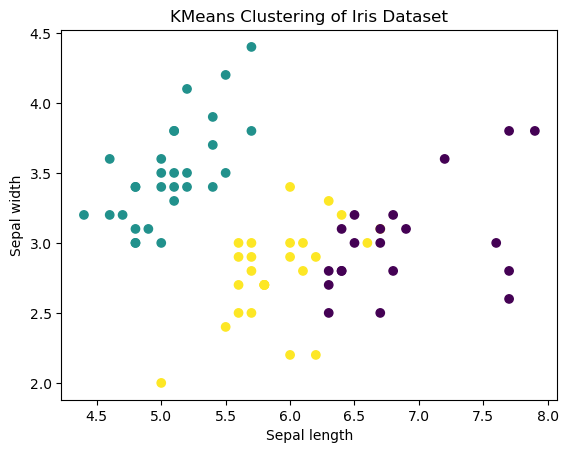

In [24]:
# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pd.read_csv(url, header=None)

# Drop any columns that won't be used for clustering
dataset.drop(dataset.columns[-1], axis=1, inplace=True)

# Split the dataset into training and testing subsets
X_train, X_test = train_test_split(dataset, test_size=0.5, random_state=42)

# Fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_train)
kmeans_labels = kmeans.predict(X_test)

# Plot the clusters
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=kmeans_labels)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("KMeans Clustering of Iris Dataset")
plt.show()

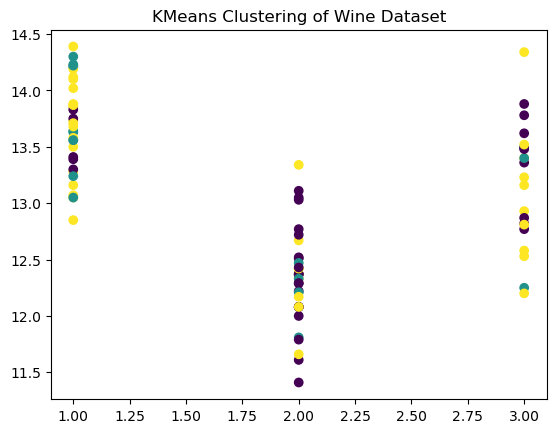

In [26]:
# Load the wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
dataset = pd.read_csv(url, header=None)

# Drop any columns that won't be used for clustering
dataset.drop(dataset.columns[-1], axis=1, inplace=True)

# Split the dataset into training and testing subsets
X_train, X_test = train_test_split(dataset, test_size=0.5, random_state=42)

# Fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_train)
kmeans_labels = kmeans.predict(X_test)

# Plot the clusters
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=kmeans_labels)
plt.title("KMeans Clustering of Wine Dataset")
plt.show()